<a href="https://colab.research.google.com/github/Aleena-Mishra-10/Banking-crises-in-Africa/blob/main/Banking_crises_in_Africa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 68 bytes


In [ ]:
!mkdir ~p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d chirin/africa-economic-banking-and-systemic-crisis-data

  0% 0.00/13.7k [00:00<?, ?B/s]
100% 13.7k/13.7k [00:00<00:00, 10.9MB/s]


In [ ]:
from zipfile import ZipFile
file_name="/content/africa-economic-banking-and-systemic-crisis-data.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


## Which factors are most associated with banking Crises in Africa ?

# 1.Introduction:
The goal of this project is to use several Machine learning and Deep learning models to determine the factors associated with the emergence of banking crises in a large sample of 13 African nations from 1860 to 2014.

# **2.Dataset description:**
The dataset specifically focuses on the Banking, Debt, Financial, Inflation and Systemic Crises that occurred, from 1860 to 2014, in 13 African countries, including: Algeria, Angola, Central African Republic, Ivory Coast, Egypt, Kenya, Mauritius, Morocco, Nigeria, South Africa, Tunisia, Zambia and Zimbabwe. Acknowledgements Reinhart, C., Rogoff, K., Trebesch, C. and Reinhart, V. (2019) Global Crises Data by Country. [online] https://www.hbs.edu/behavioral-finance-and-financial-stability/data. Available at: https://www.hbs.edu/behavioral-finance-and-financial-stability/data/Pages/global.aspx [Accessed: 17 July 2019].

## **Input variables:**


*   **systemic_crisis** : "0" means that no systemic crisis occurred in the year and "1" means that a systemic crisis occurred in the year;
*  exch_usd : The exchange rate of the country vis-a-vis the USD;


*   **domestic_debt_in_default** : "0" means that no sovereign domestic debt default occurred in the year and "1" means that a sovereign domestic debt default occurred in the year; 
*  **sovereign_external_debt_default**: "0" means that no sovereign external debt default occurred in the year and "1" means that a sovereign external debt default occurred in the year;


* **gdp_weighted_default** : The total debt in default vis-a-vis the GDP;
*   **inflation_annual_cpi** : The annual CPI Inflation rate;




*   **independence** : "0" means "no independence" and "1" means "independence";
*  **currency_crises**  : "0" means that no currency crisis occurred in the year and "1" means that a currency crisis occurred in the year;


*   **inflation_crises**: "0" means that no inflation crisis occurred in the year and "1" means that an inflation crisis occurred in the year.

## **Predict variable (desired target):**

*   **banking_crisis** : "no_crisis" means that no banking crisis occurred in the year and "crisis" means that a banking crisis occurred in the year.































In [ ]:
# Import needed Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

%matplotlib inline

In [ ]:
#Importing dataset
data = pd.read_csv('/content/african_crises.csv')

In [ ]:
data.head()

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


## **3.Data exploration**
This step is crucial. The goal is to get a better understanding of the data. That intuition will be helpful when modeling, imputing missing data and looking at outliers.

In [ ]:
#count the number of rows and columns in the dataset
print(data.shape)

(1059, 14)


(1059, 14) as output which means our dataset has 1059 rows and 14 columns.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case                             1059 non-null   int64  
 1   cc3                              1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [ ]:
# Get column names
data.columns

Index(['case', 'cc3', 'country', 'year', 'systemic_crisis', 'exch_usd',
       'domestic_debt_in_default', 'sovereign_external_debt_default',
       'gdp_weighted_default', 'inflation_annual_cpi', 'independence',
       'currency_crises', 'inflation_crises', 'banking_crisis'],
      dtype='object')

## Visualisations

### **Systemic Crisis**

A systemic crisis is a domino effect in which a financial trouble spreads. between institutions and markets until it affects the whole monetary. and financial system with dire global economic consequences

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

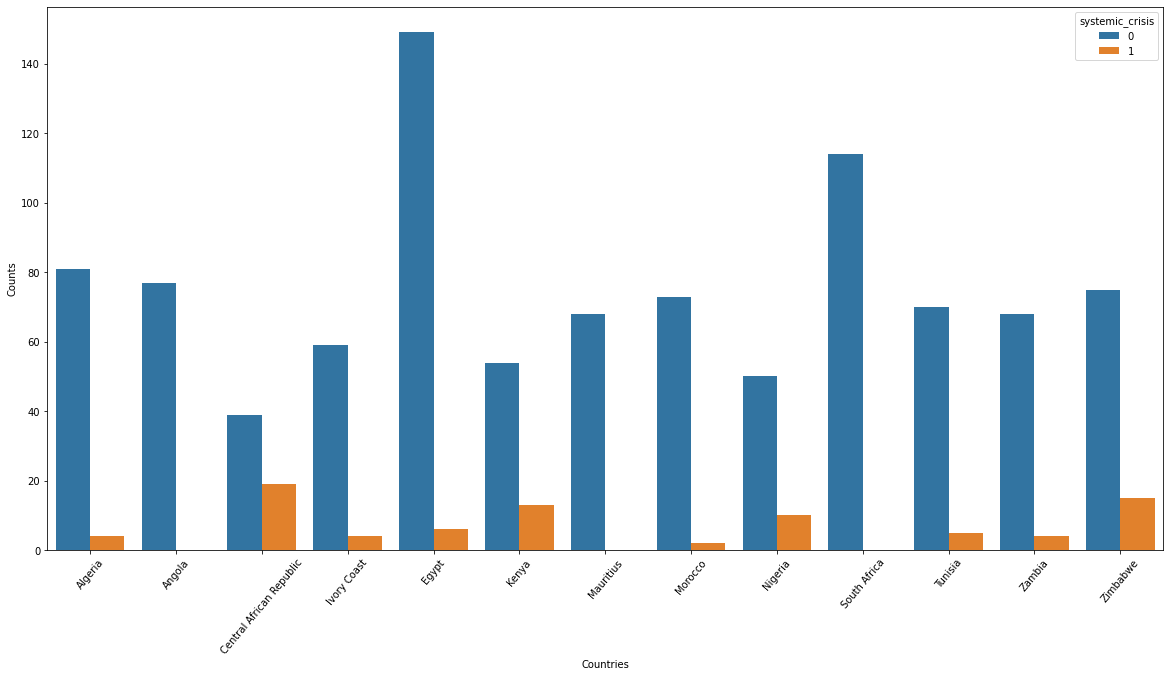

In [ ]:
fig,ax = plt.subplots(figsize=(20,10))
sns.countplot(data['country'],hue=data['systemic_crisis'],ax=ax)
plt.xlabel('Countries')
plt.ylabel('Counts')
plt.xticks(rotation=50)

The country that shows the highest count for systemic crisis is Central African Republic followed by Zimbabwe and Kenya. As per the definition of systemic crisis, there should be a link between systemic crisis and banking crisis. Lets check if these countries had a banking crisis at the same time.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


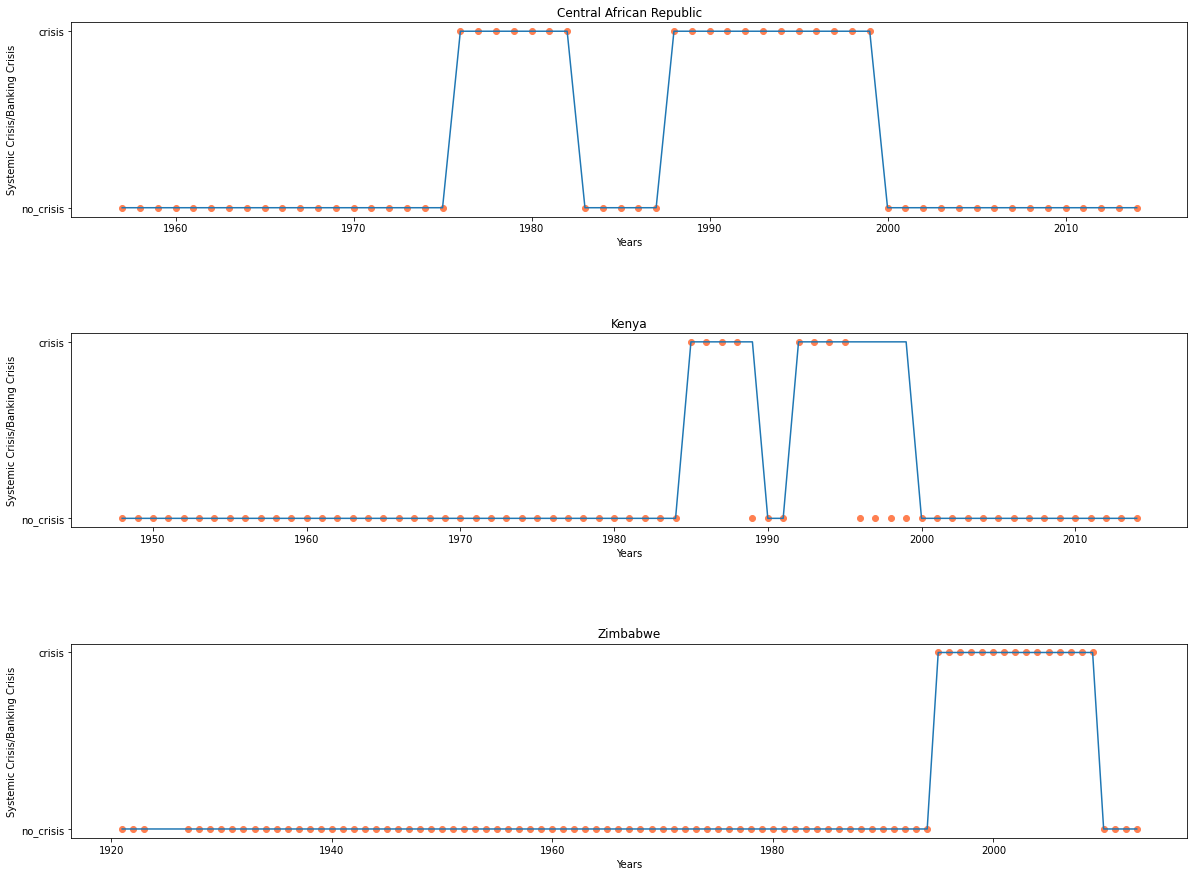

In [ ]:
systemic = data[['year','country', 'systemic_crisis', 'banking_crisis']]
systemic = systemic[(systemic['country'] == 'Central African Republic') | (systemic['country']=='Kenya') | (systemic['country']=='Zimbabwe') ]
plt.figure(figsize=(20,15))
count = 1

for country in systemic.country.unique():
    plt.subplot(len(systemic.country.unique()),1,count)
    subset = systemic[(systemic['country'] == country)]
    sns.lineplot(subset['year'],subset['systemic_crisis'],ci=None)
    plt.scatter(subset['year'],subset["banking_crisis"], color='coral', label='Banking Crisis')
    plt.subplots_adjust(hspace=0.6)
    plt.xlabel('Years')
    plt.ylabel('Systemic Crisis/Banking Crisis')
    plt.title(country)
    count+=1

This shows how both the crisis overlap leading to confirming that systemic crisis has an impact on banking crisis.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

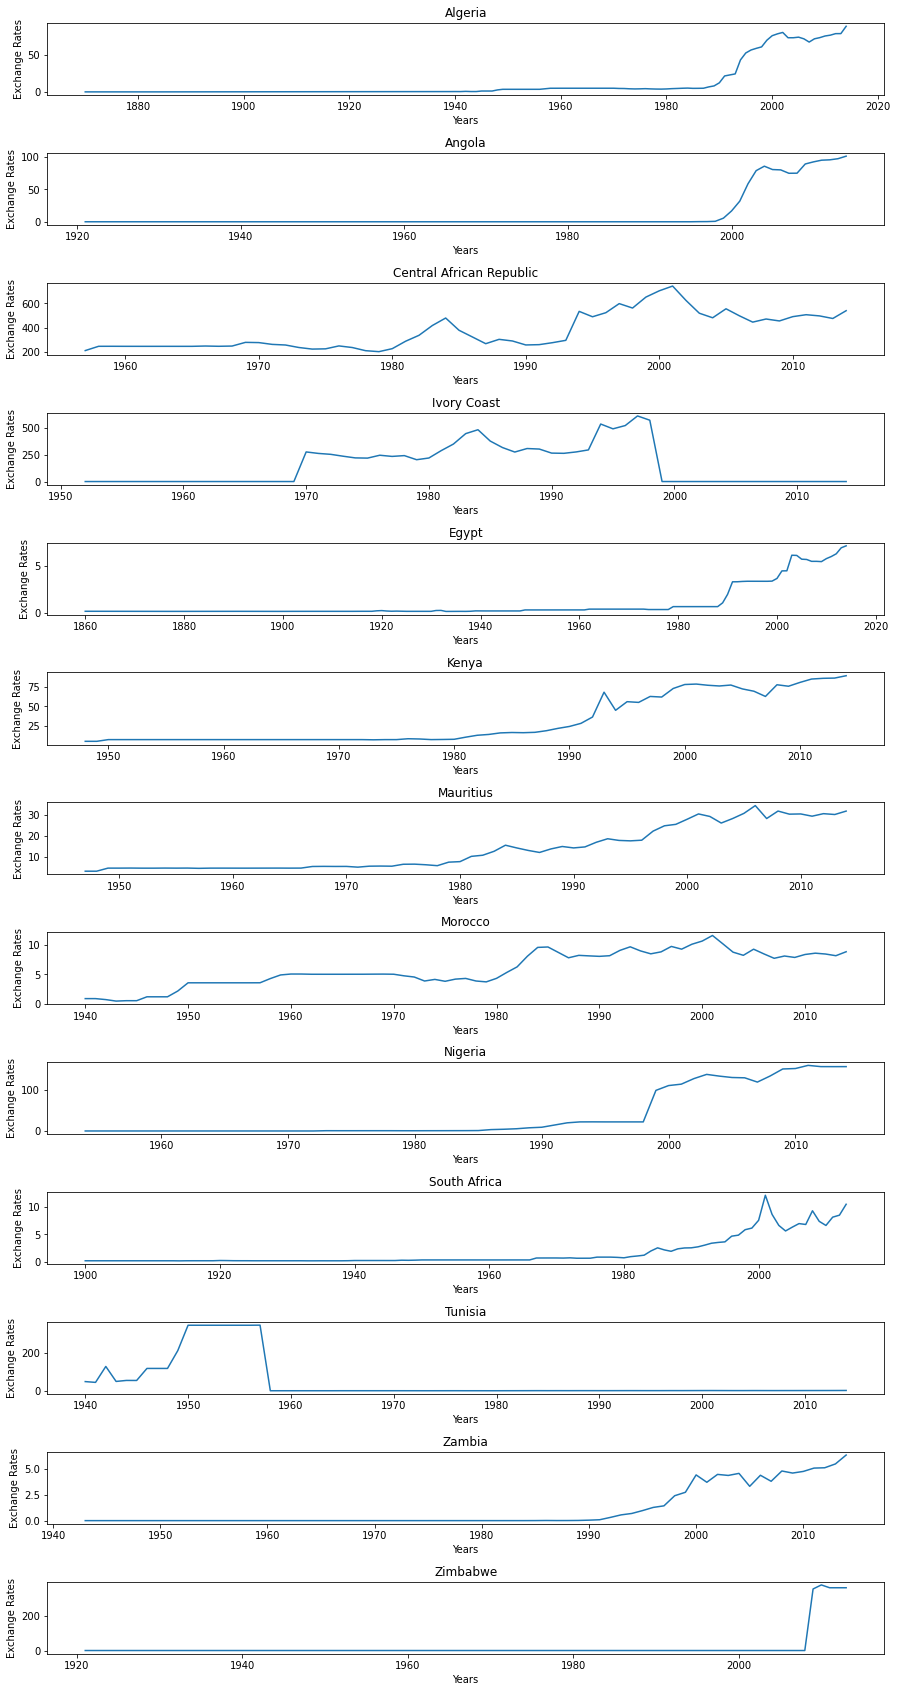

In [ ]:
plt.figure(figsize=(15,30))
count = 1
for country in data.country.unique():
    plt.subplot(len(data.country.unique()),1,count)
    count+=1
    sns.lineplot(data[data.country==country]['year'],data[data.country==country]['exch_usd'])
    plt.subplots_adjust(hspace=0.8)
    plt.xlabel('Years')
    plt.ylabel('Exchange Rates')
    plt.title(country)

## **Sovereign Domestic Debt Default¶**

Sovereign debt is a central government's debt. It is debt issued by the national government in a foreign currency in order to finance the issuing country's growth and development. The stability of the issuing government can be provided by the country's sovereign credit ratings which help investors weigh risks when assessing sovereign debt investments.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

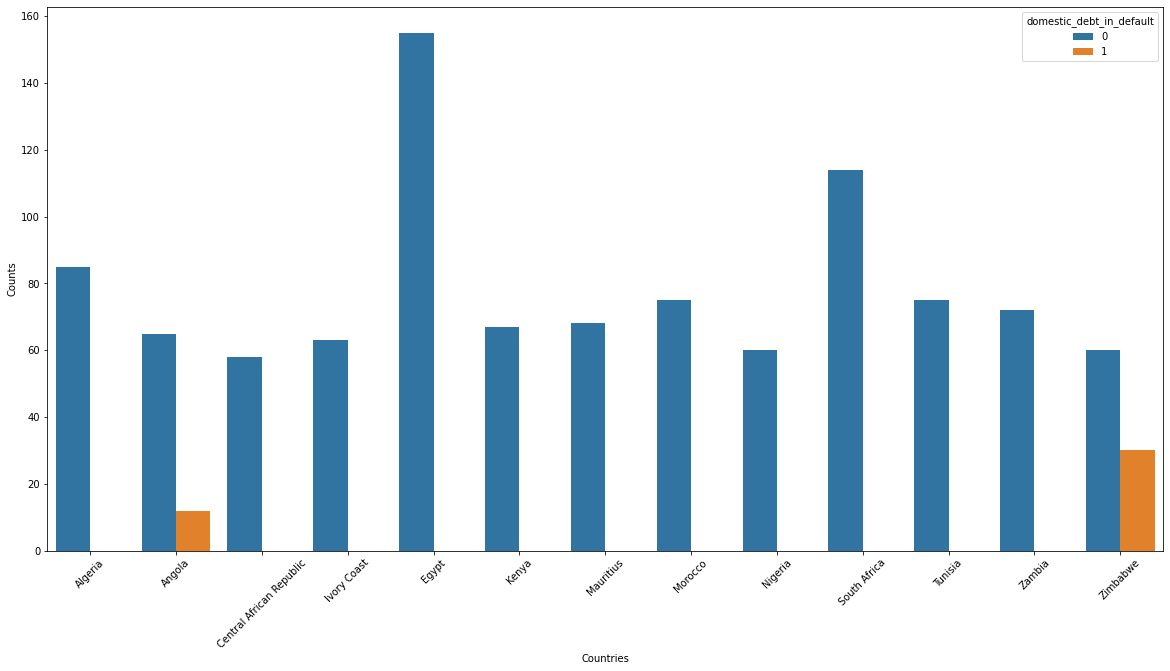

In [ ]:
fig,ax = plt.subplots(figsize=(20,10))
sns.countplot(data['country'],hue=data['domestic_debt_in_default'],ax=ax)
plt.xlabel('Countries')
plt.ylabel('Counts')
plt.xticks(rotation=45)

We see only Angola and Zimbabwe defaulting. Let's take a look at a few other things for these two countries in particular

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


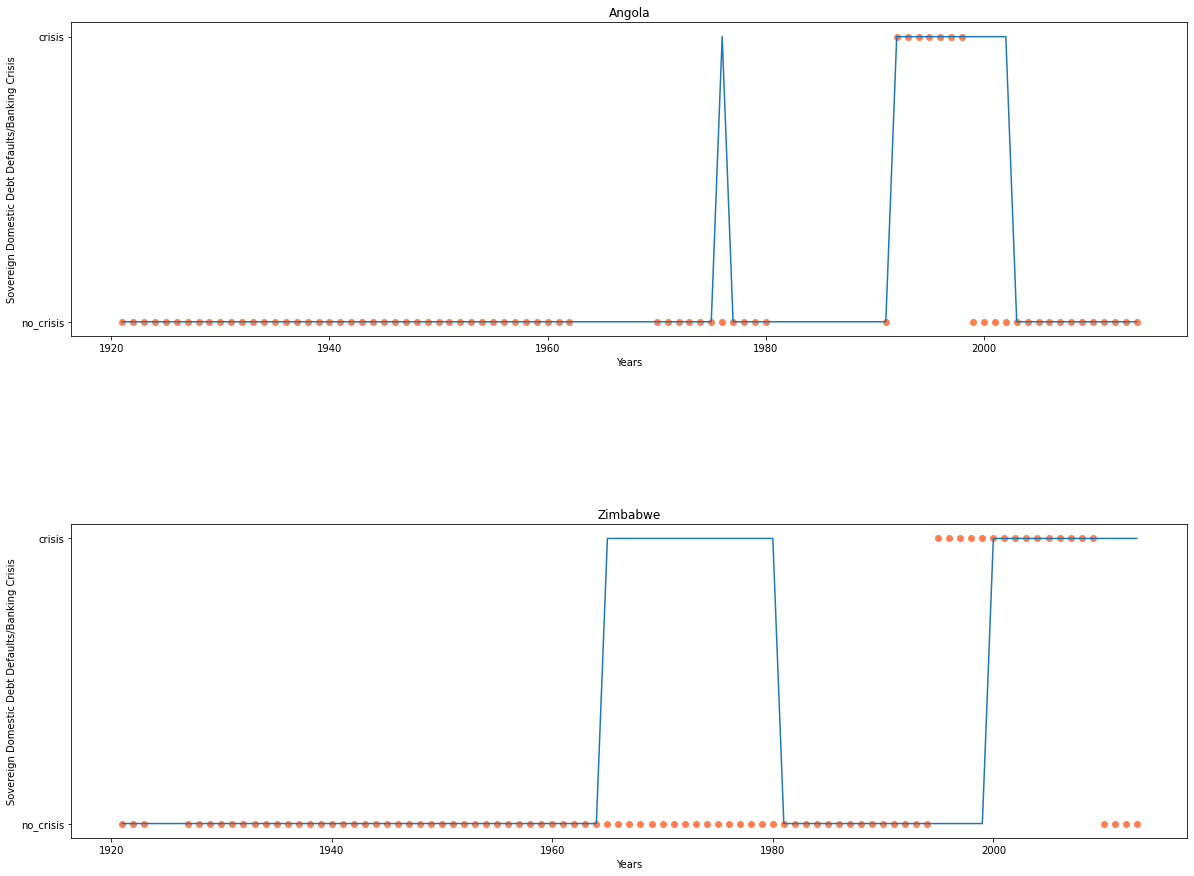

In [ ]:
sovereign = data[['year','country', 'domestic_debt_in_default', 'banking_crisis']]
sovereign = sovereign[(sovereign['country'] == 'Angola') | (sovereign['country']=='Zimbabwe') ]
plt.figure(figsize=(20,15))
count = 1

for country in sovereign.country.unique():
    plt.subplot(len(sovereign.country.unique()),1,count)
    subset = sovereign[(sovereign['country'] == country)]
    sns.lineplot(subset['year'],subset['domestic_debt_in_default'],ci=None)
    plt.scatter(subset['year'],subset["banking_crisis"], color='coral', label='Banking Crisis')
    plt.subplots_adjust(hspace=0.6)
    plt.xlabel('Years')
    plt.ylabel('Sovereign Domestic Debt Defaults/Banking Crisis')
    plt.title(country)
    count+=1

This shows that during the times these two coutries faced a banking crisis, they also defaulted on the sovereign debts. For example, for Angola, somewhere around late 1970's despite not having a banking crisis, the country defaulted for domestic default but quickly came back from it. After that, it was only around the begining of 1990, we see that a banking crisis, eventually lead the country to default again. Similarly, for Zimbabwe the country was already facing a banking crisis which eventually led it to default on domestic debts.



### **Sovereign External Debt Default**

External debt is the portion of a country's debt that was borrowed from foreign lenders, including commercial banks, governments, or international financial institutions. These loans, including interest, must usually be paid in the currency in which the loan was made. To earn the needed currency, the borrowing country may sell and export goods to the lender's country.

A debt crisis can occur if a country with a weak economy is not able to repay the external debt due to the inability to produce and sell goods and make a profitable return.

If a nation is unable or refuses to repay its external debt, it is said to be in a sovereign default. This can lead to the lenders withholding future releases of assets that might be needed by the borrowing nation. Such instances can have a rolling effect, wherein the borrower’s currency collapses and that nation’s overall economic growth is stalled

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

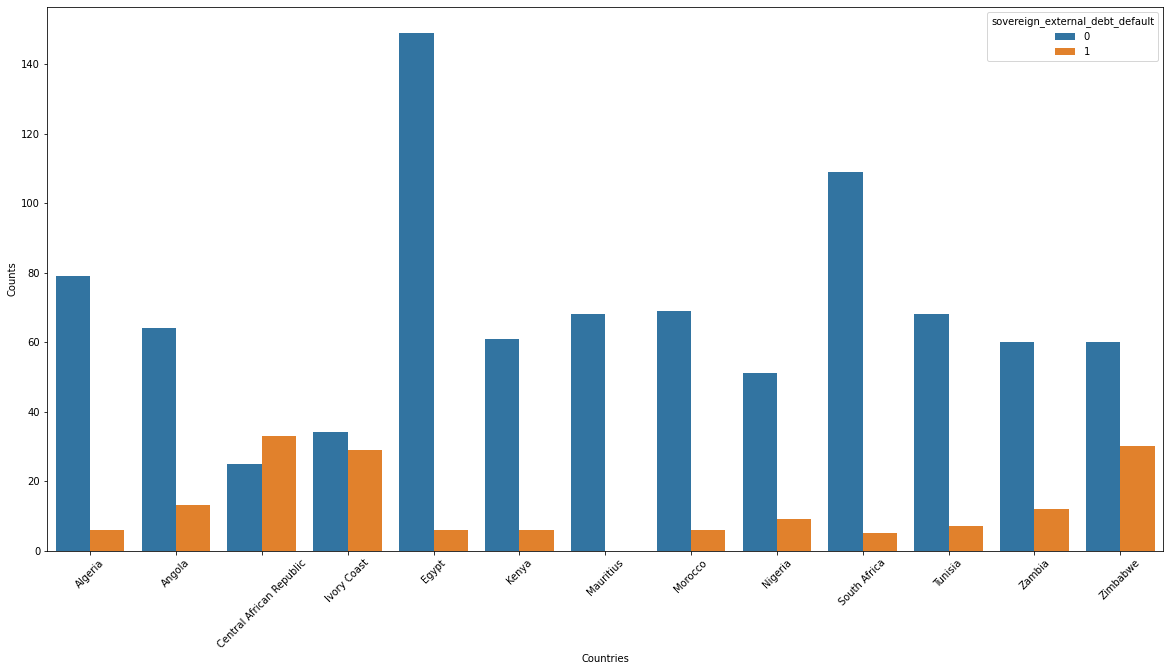

In [ ]:
fig,ax = plt.subplots(figsize=(20,10))
sns.countplot(data['country'],hue=data['sovereign_external_debt_default'],ax=ax)
plt.xlabel('Countries')
plt.ylabel('Counts')
plt.xticks(rotation=45)

We see only Central African Republic , Ivory Coast and Zimbabwe defaulting. Let's take a look at a few other things for these three countries in particular

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


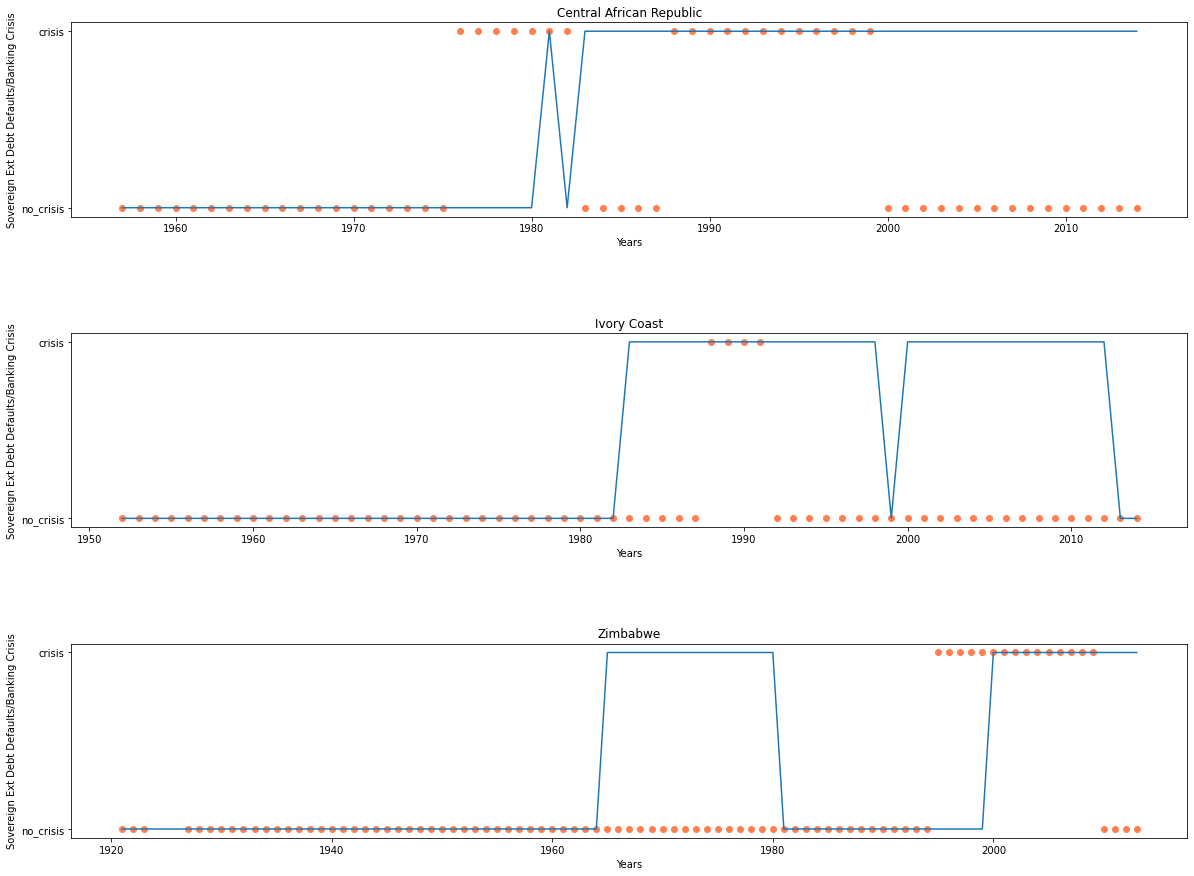

In [ ]:
sovereign_ext = data[['year','country', 'sovereign_external_debt_default', 'banking_crisis']]
sovereign_ext = sovereign_ext[(sovereign_ext['country'] == 'Central African Republic') | (sovereign_ext['country'] == 'Ivory Coast') | (sovereign_ext['country']=='Zimbabwe') ]
plt.figure(figsize=(20,15))
count = 1

for country in sovereign_ext.country.unique():
    plt.subplot(len(sovereign_ext.country.unique()),1,count)
    subset = sovereign_ext[(sovereign_ext['country'] == country)]
    sns.lineplot(subset['year'],subset['sovereign_external_debt_default'],ci=None)
    plt.scatter(subset['year'],subset["banking_crisis"], color='coral', label='Banking Crisis')
    plt.subplots_adjust(hspace=0.6)
    plt.xlabel('Years')
    plt.ylabel('Sovereign Ext Debt Defaults/Banking Crisis')
    plt.title(country)
    count+=1

This shows that the three countries default on external debt, despite not having a banking crisis as a premise. Even without the banking crisis they are marked to default on external debt.

## **Currency** **Crisis**

A currency crisis is a situation in which serious doubt exists as to whether a country's central bank has sufficient foreign exchange reserves to maintain the country's fixed exchange rate. The crisis is often accompanied by a speculative attack in the foreign exchange market. A currency crisis results from chronic balance of payments deficits, and thus is also called a balance of payments crisis. Often such a crisis culminates in a devaluation of the currency. Let's take a look at the countries who were reported to have faced a currency crisis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

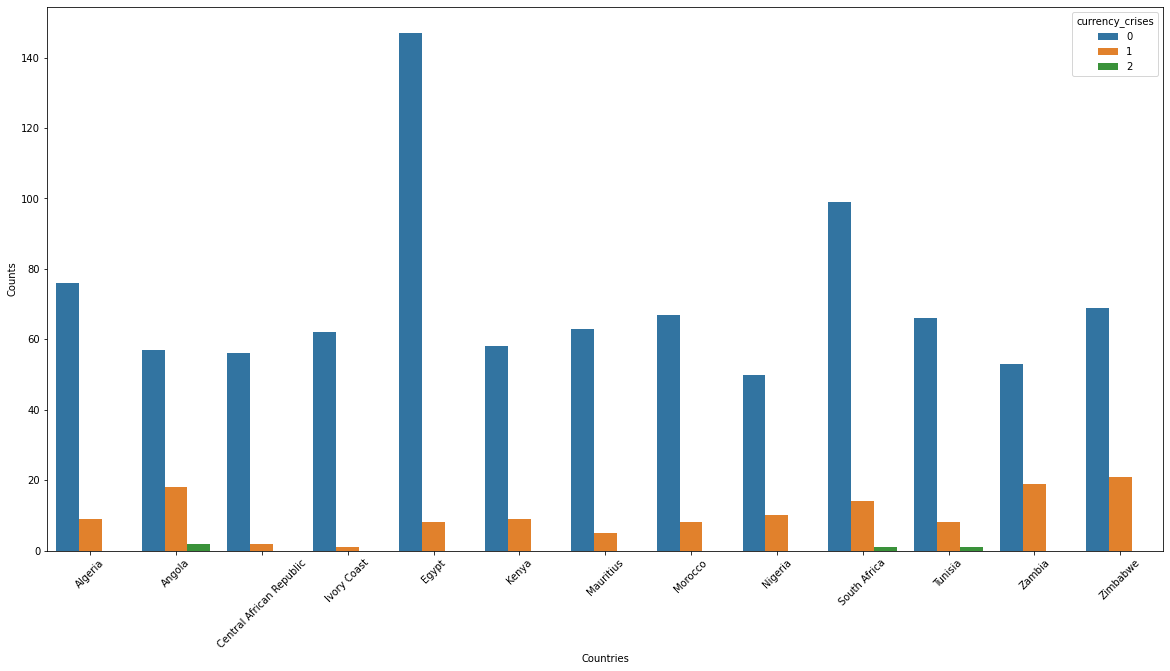

In [ ]:
fig,ax = plt.subplots(figsize=(20,10))
sns.countplot(data['country'],hue=data['currency_crises'],ax=ax)
plt.xlabel('Countries')
plt.ylabel('Counts')
plt.xticks(rotation=45)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


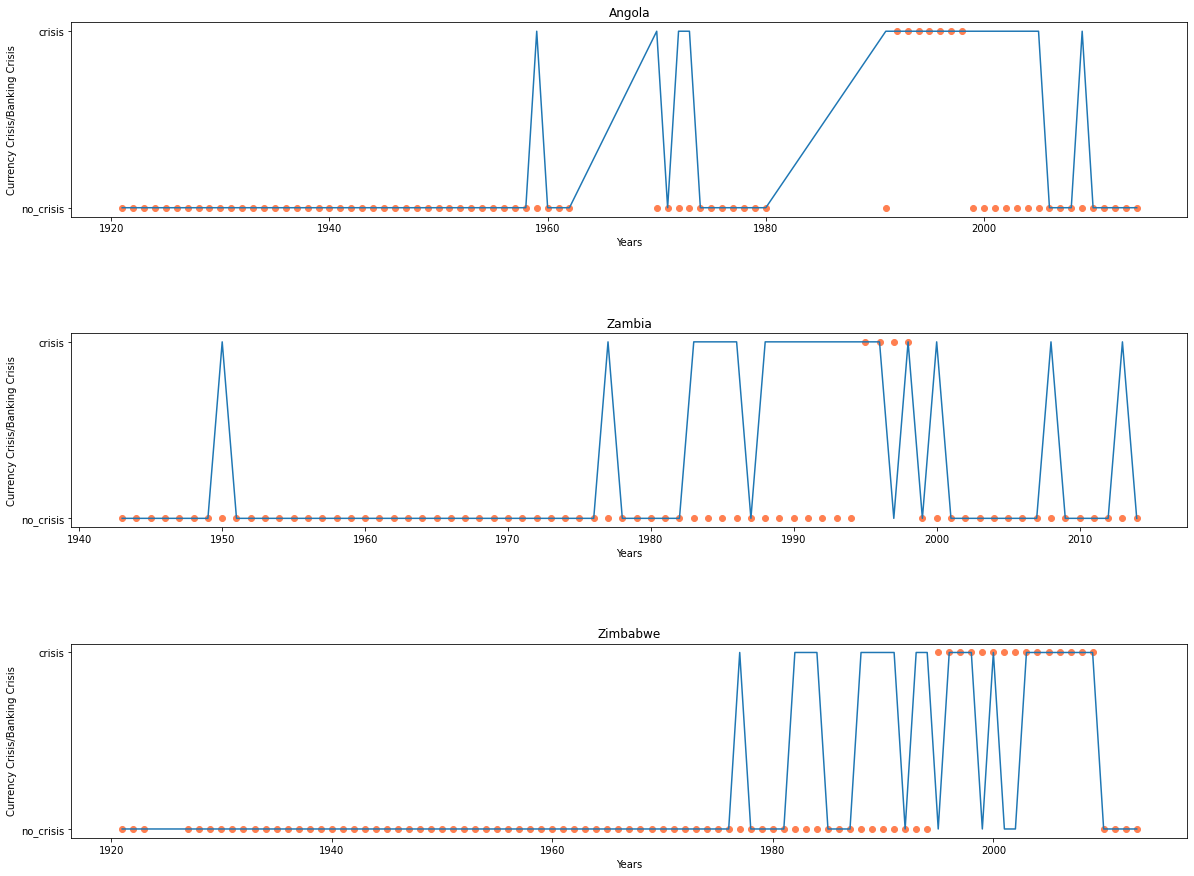

In [ ]:
curr = data[['year','country', 'currency_crises', 'banking_crisis']]
curr = curr[(curr['country'] == 'Angola') | (curr['country'] == 'Zambia') | (curr['country']=='Zimbabwe') ]
curr = curr.replace(to_replace=2, value=1, regex=False)

plt.figure(figsize=(20,15))
count = 1

for country in curr.country.unique():
    plt.subplot(len(curr.country.unique()),1,count)
    subset = curr[(curr['country'] == country)]
    sns.lineplot(subset['year'],subset['currency_crises'],ci=None)
    plt.scatter(subset['year'],subset["banking_crisis"], color='coral', label='Banking Crisis')
    plt.subplots_adjust(hspace=0.6)
    plt.xlabel('Years')
    plt.ylabel('Currency Crisis/Banking Crisis')
    plt.title(country)
    count+=1

What we see is that these countries faced fluctuating currency crisis even before they were hit with a banking crisis. For example look at Zimbabwe's currency crisis spread. This country faced a currency crisis on and off for around 10 years in total before it faced a banking crisis.

Inflation Crisis

Inflation is a quantitative measure of the rate at which the average price level of a basket of selected goods and services in an economy increases over a period of time. It is the constant rise in the general level of prices where a unit of currency buys less than it did in prior periods.

Let's look at the countries that were accounted for an inflation crisis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text major ticklabel objects>)

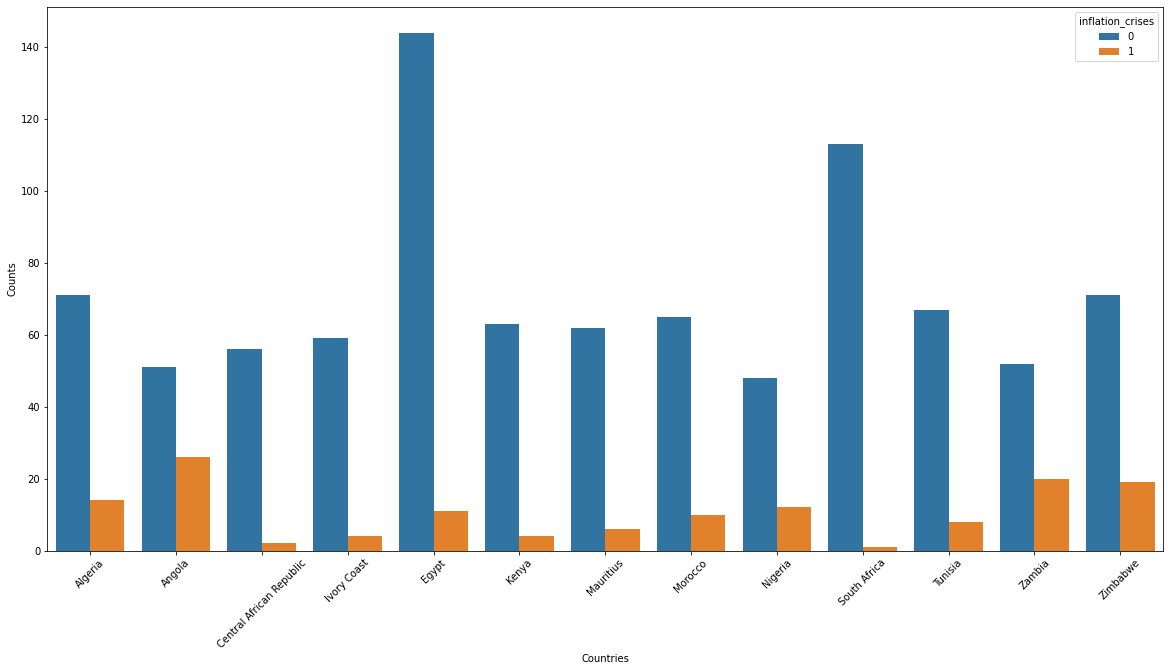

In [ ]:
fig,ax = plt.subplots(figsize=(20,10))
sns.countplot(data['country'],hue=data['inflation_crises'],ax=ax)
plt.xlabel('Countries')
plt.ylabel('Counts')
plt.xticks(rotation=45)

Most commonly used inflation indexes are the Consumer Price Index (CPI). Let's look at the Annual CPI for the three countries to see if we can derive any insights.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


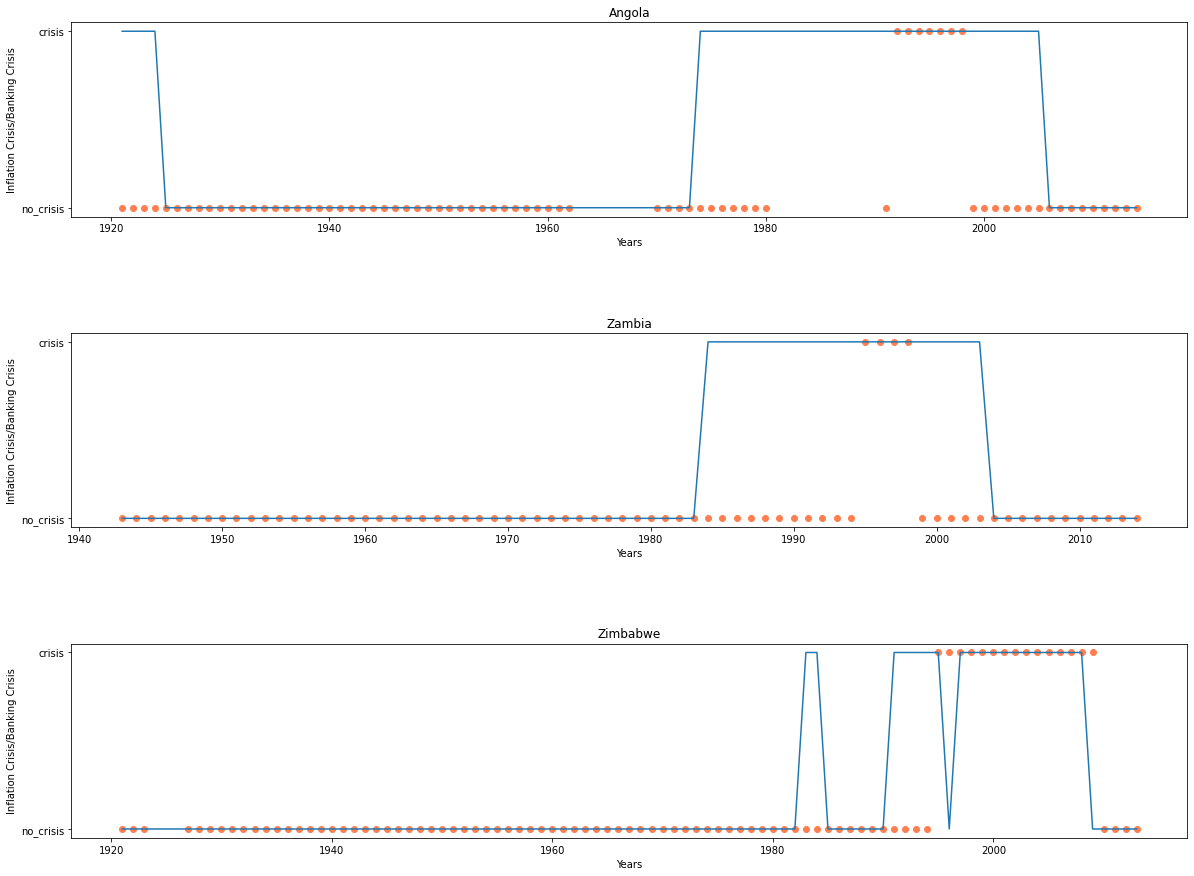

In [ ]:
infla = data[['year','country', 'inflation_crises', 'inflation_annual_cpi', 'banking_crisis']]
infla = infla[(infla['country'] == 'Angola') | (infla['country'] == 'Zambia') | (infla['country']=='Zimbabwe') ]
infla = infla.replace(to_replace=2, value=1, regex=False)

plt.figure(figsize=(20,15))
count = 1

for country in infla.country.unique():
    plt.subplot(len(infla.country.unique()),1,count)
    subset = infla[(infla['country'] == country)]
    sns.lineplot(subset['year'],subset['inflation_crises'],ci=None)
    plt.scatter(subset['year'],subset["banking_crisis"], color='coral', label='Banking Crisis')
    plt.subplots_adjust(hspace=0.6)
    plt.xlabel('Years')
    plt.ylabel('Inflation Crisis/Banking Crisis')
    plt.title(country)
    count+=1


Again, like currency crisis, we see that the countries had an inflation crisis, despite not being hit by a banking crisis. Inflation can be viewed positively or negatively depending on the individual viewpoint. Those with tangible assets, like property or stocked commodities, may like to see some inflation as that raises the value of their assets. People holding cash may not like inflation, as it erodes the value of their cash holdings. Ideally, an optimum level of inflation is required to promote spending to a certain extent instead of saving, thereby nurturing economic growth.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


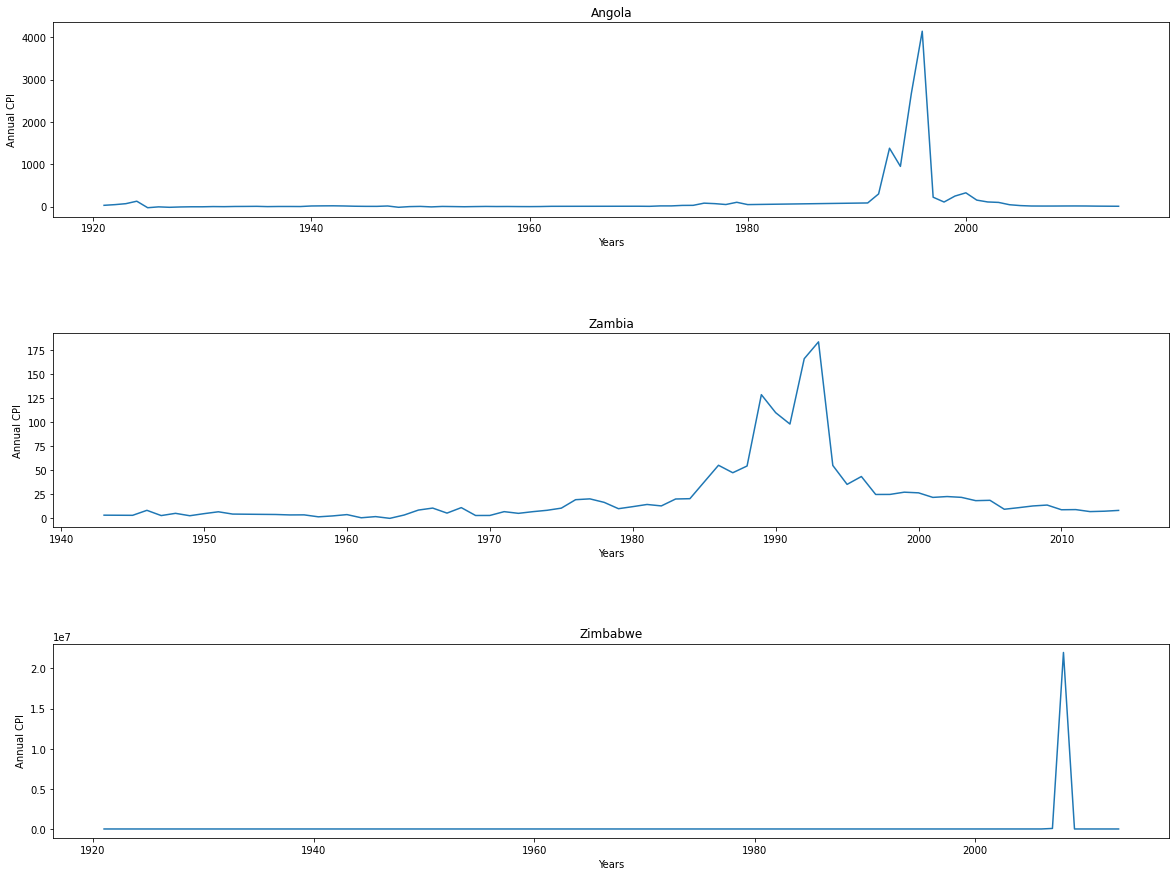

In [ ]:
plt.figure(figsize=(20,15))
count = 1

for country in infla.country.unique():
    plt.subplot(len(infla.country.unique()),1,count)
    subset = infla[(infla['country'] == country)]
    sns.lineplot(subset[subset.country==country]['year'], subset[subset.country==country]['inflation_annual_cpi'])
    plt.subplots_adjust(hspace=0.6)
    plt.xlabel('Years')
    plt.ylabel('Annual CPI')
    plt.title(country)
    count+=1

The rise in the annual CPI for the countries co-incide around the same time period when the country was facing a banking crisis.

# Year wise average usd exchange rate of each country

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

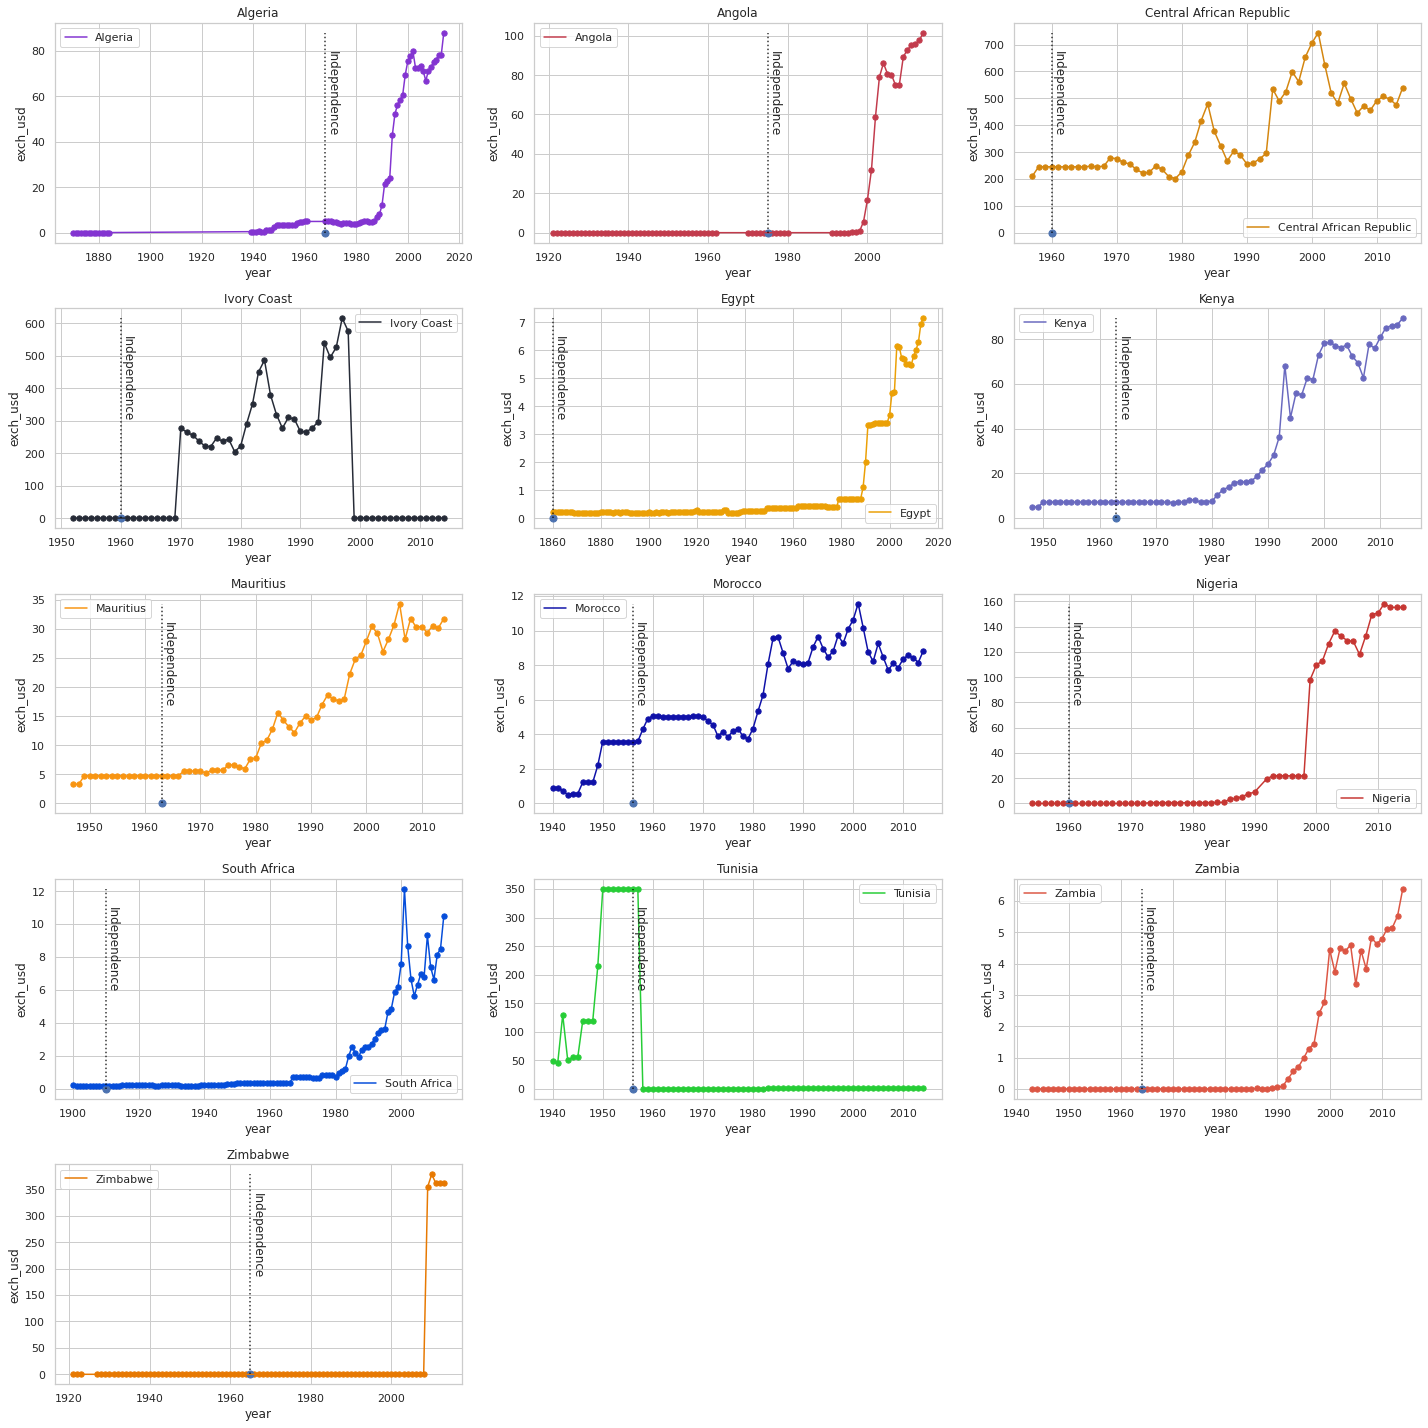

In [ ]:
import random
sns.set(style='whitegrid')
plt.figure(figsize=(20,20))
count=1
for country in data.country.unique():
    plt.subplot(5,3,count)
    count+=1
    col="#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    sns.lineplot(data[data.country==country]['year'],
                 data[data.country==country]['exch_usd'],
                 label=country,
                 color=col)
    plt.scatter(data[data.country==country]['year'],
                data[data.country==country]['exch_usd'],
                color=col,
                s=28)
    plt.plot([np.min(data[np.logical_and(data.country==country,data.independence==1)]['year']),
              np.min(data[np.logical_and(data.country==country,data.independence==1)]['year'])],
             [0,
              np.max(data[data.country==country]['exch_usd'])],
             color='black',
             linestyle='dotted',
             alpha=0.8)
    plt.text(np.min(data[np.logical_and(data.country==country,data.independence==1)]['year']),
             np.max(data[data.country==country]['exch_usd'])/2,
             'Independence',
             rotation=-90)
    plt.scatter(x=np.min(data[np.logical_and(data.country==country,data.independence==1)]['year']),
                y=0,
                s=50)
    plt.title(country)
plt.tight_layout()
plt.show()

From the above graph , we can observe that , country Algeria had a consistent exchange rate till 30-40 years in the late 1980s. Central African Republic did not have consistent exchange rate. Ivory coast had consistent exhange rate till 1970. Zimbabwe has terrible exchange rate around 2000.

## Different debt count of each country

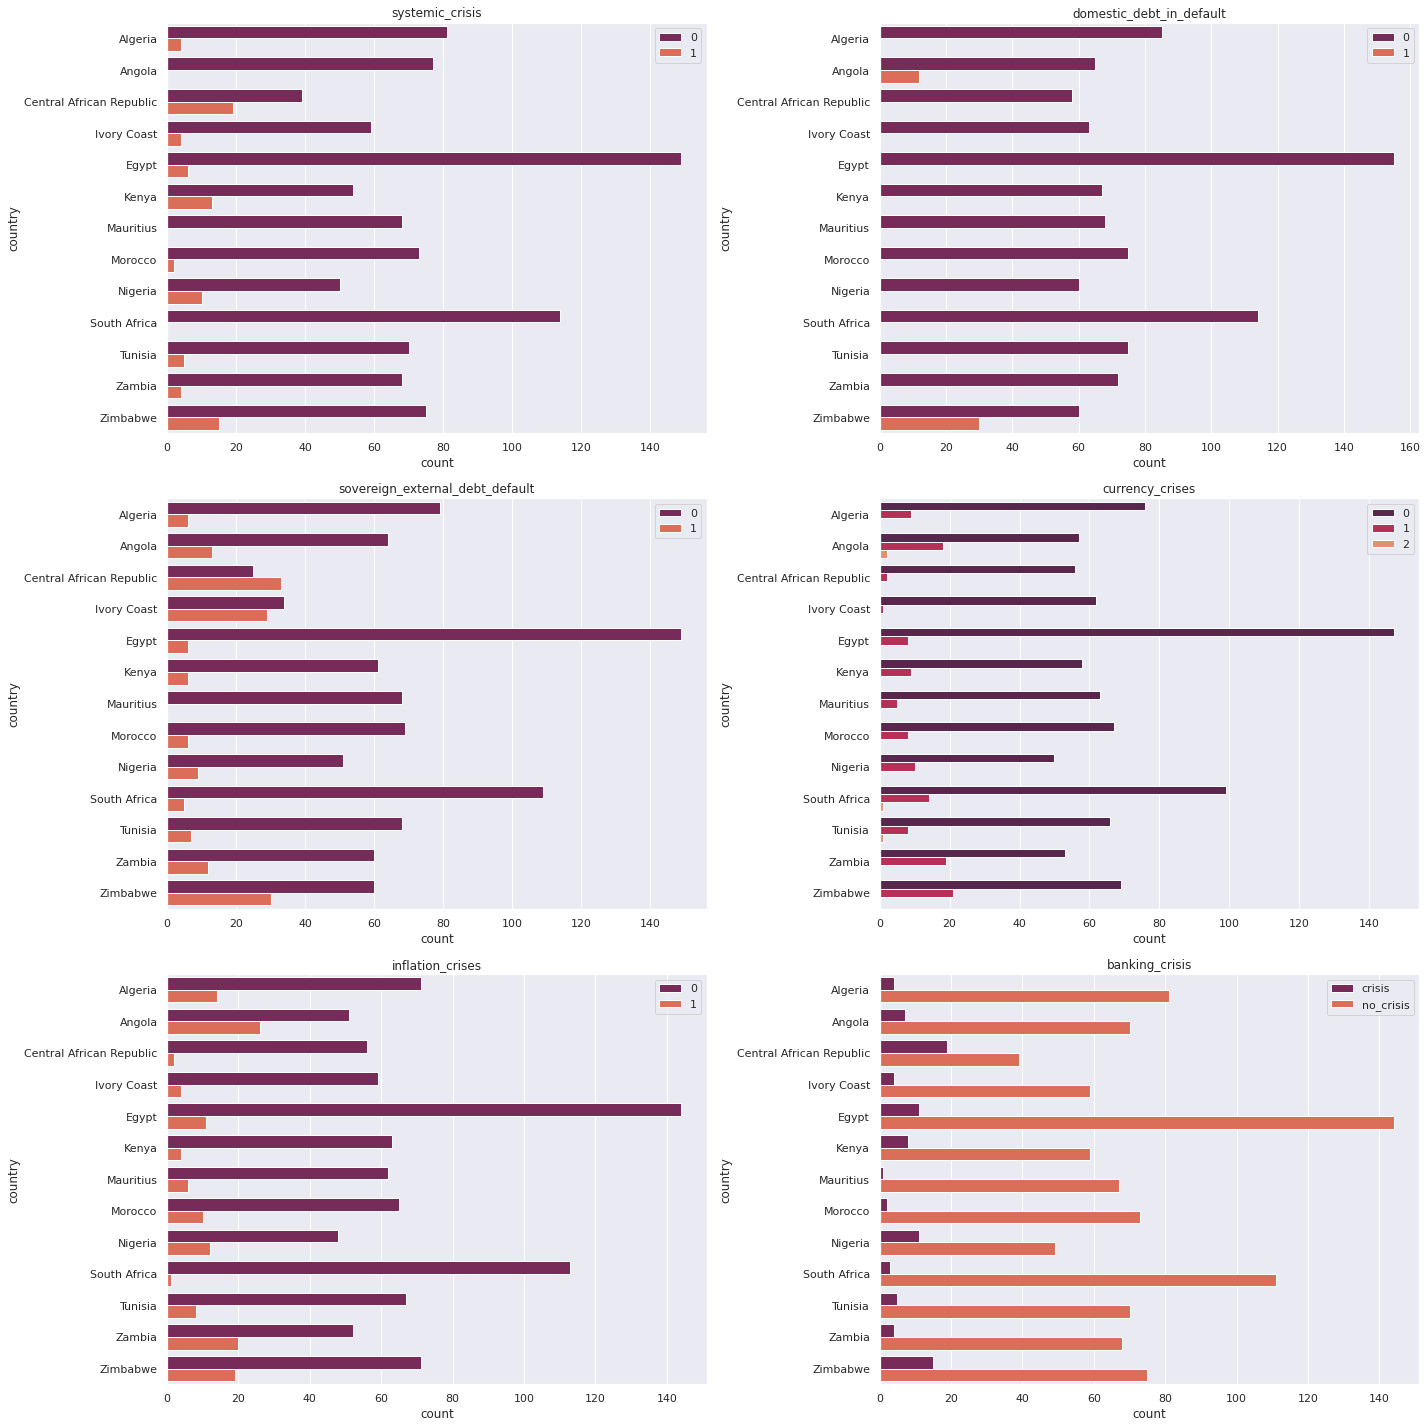

In [ ]:
sns.set(style='darkgrid')
cols=['systemic_crisis','domestic_debt_in_default','sovereign_external_debt_default','currency_crises','inflation_crises','banking_crisis']
plt.figure(figsize=(20,20))
count=1
for col in cols:
    plt.subplot(3,2,count)
    count+=1
    sns.countplot(y=data.country,hue=data[col],palette='rocket')
    plt.legend(loc=0)
    plt.title(col)
plt.tight_layout()
plt.show()

Kenya had under 10years of systematic crises before independent.These graphs tell us how many times different counties had under gone the different crises.

## Average year wise inflation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

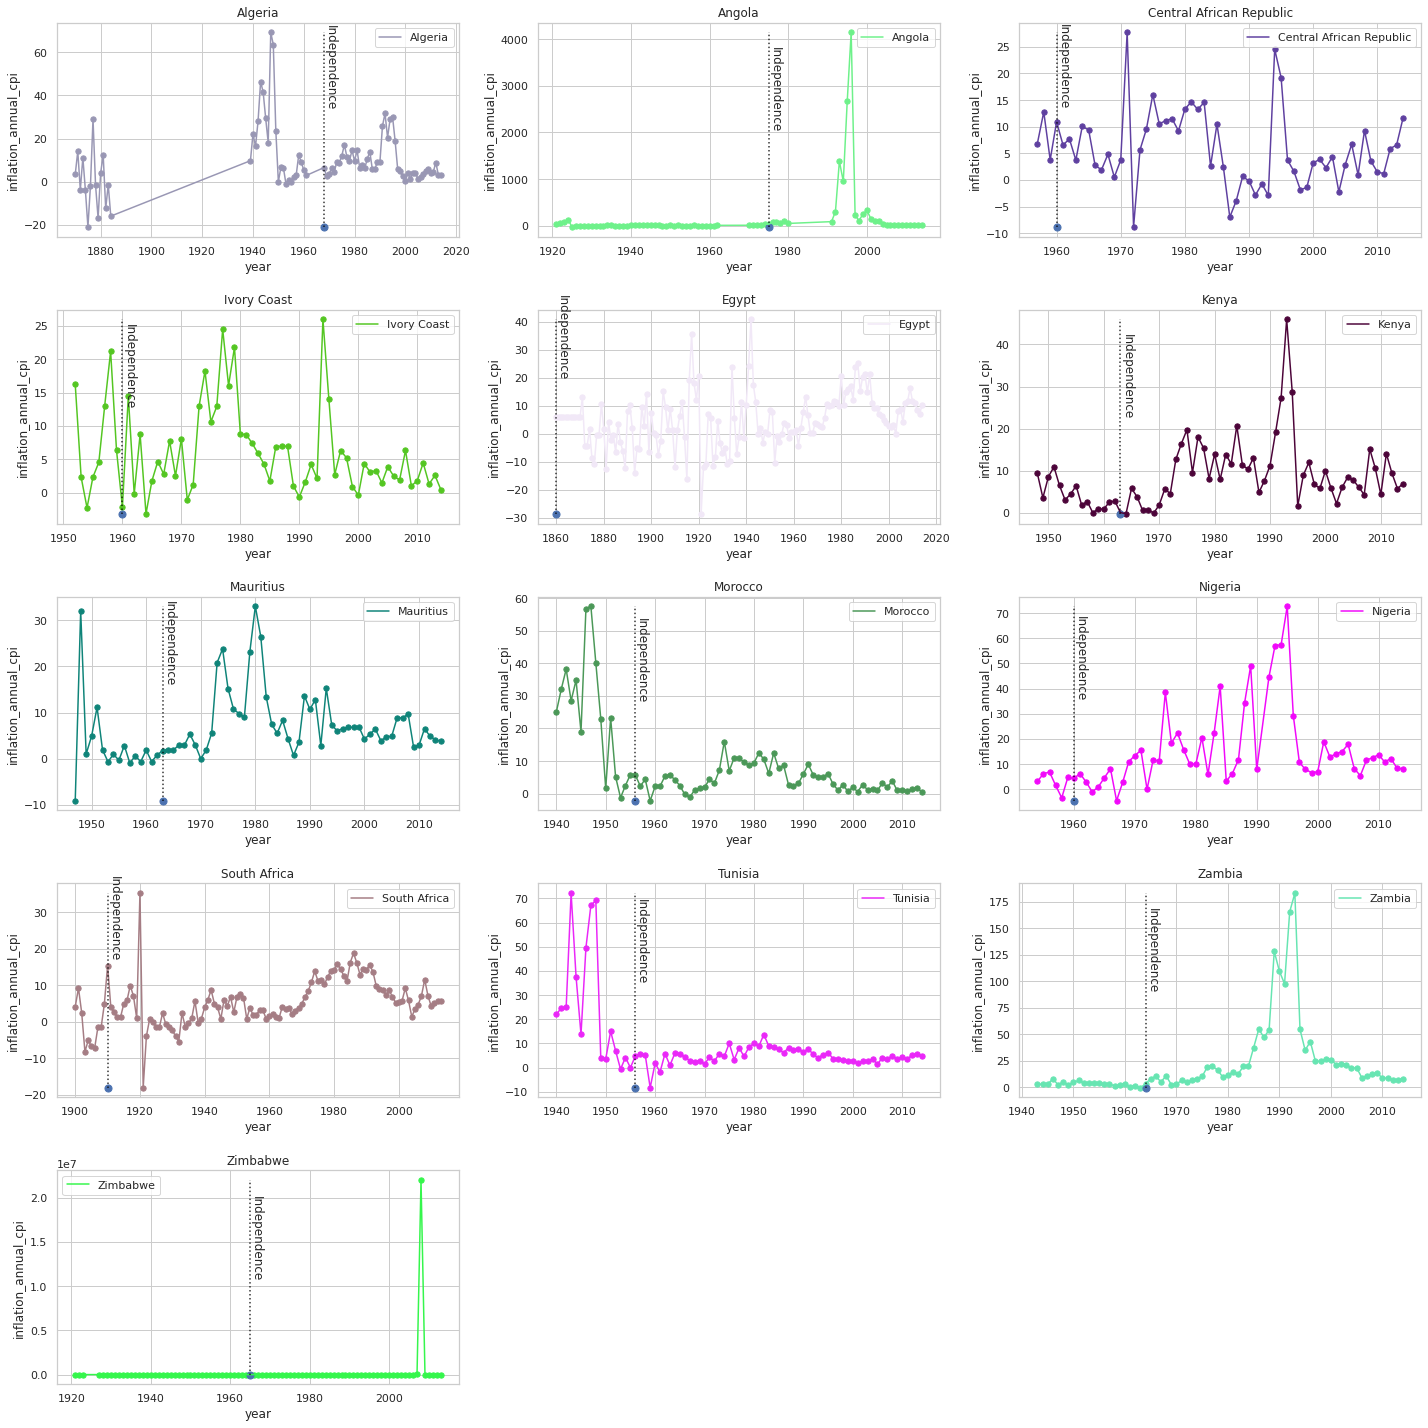

In [ ]:
sns.set(style='whitegrid')
plt.figure(figsize=(20,20))
count=1

for country in  data.country.unique():
    plt.subplot(5,3,count)
    count+=1
    col="#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
    sns.lineplot(data[data.country==country]['year'],
                 data[data.country==country]['inflation_annual_cpi'],
                 label=country,
                 color=col)
    plt.scatter(data[data.country==country]['year'],
                data[data.country==country]['inflation_annual_cpi'],
                color=col,
                s=28)
    plt.plot([np.min(data[np.logical_and(data.country==country,data.independence==1)]['year']),
              np.min(data[np.logical_and(data.country==country,data.independence==1)]['year'])],
             [np.min(data[data.country==country]['inflation_annual_cpi']),
              np.max(data[data.country==country]['inflation_annual_cpi'])],
             color='black',
             linestyle='dotted',
             alpha=0.8)
    plt.text(np.min(data[np.logical_and(data.country==country,data.independence==1)]['year']),
             np.max(data[data.country==country]['inflation_annual_cpi'])/2,
             'Independence',
             rotation=-90)
    plt.scatter(x=np.min(data[np.logical_and(data.country==country,data.independence==1)]['year']),
                y=np.min(data[data.country==country]['inflation_annual_cpi']),
                s=50)
    plt.title(country)
plt.tight_layout()
plt.show()

Inflation of Angola , Egypt was little bit consistent at the end. Kenya is quite stable. Morocco is quite stable since 1960 to 2010. Tunsia is quite stable since last 50 years. Zimbabwe is in hyperinflation.

In [ ]:
Correlation = data.corr()
Correlation

,case,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
case,1.000000,0.115574,0.010991,-0.231976,0.128358,-0.039262,-0.032981,0.044762,0.021858,0.095339,0.006405
year,0.115574,1.000000,0.197450,0.248757,0.136828,0.271890,-0.054670,0.037035,0.407360,0.189390,0.098630
systemic_crisis,0.010991,0.197450,1.000000,0.202687,0.122158,0.249850,0.005274,0.106452,0.147083,0.112751,0.172562
exch_usd,-0.231976,0.248757,0.202687,1.000000,0.005253,0.422890,-0.040726,-0.011947,0.126034,-0.056472,-0.063783
domestic_debt_in_default,0.128358,0.136828,0.122158,0.005253,1.000000,0.464751,-0.029874,0.151832,0.109120,0.227585,0.224429
sovereign_external_debt_default,-0.039262,0.271890,0.249850,0.422890,0.464751,1.000000,0.345919,0.072609,0.228192,0.199428,0.187930
gdp_weighted_default,-0.032981,-0.054670,0.005274,-0.040726,-0.029874,0.345919,1.000000,-0.004535,0.078936,0.016970,0.017630
inflation_annual_cpi,0.044762,0.037035,0.106452,-0.011947,0.151832,0.072609,-0.004535,1.000000,0.016569,0.076590,0.080060
independence,0.021858,0.407360,0.147083,0.126034,0.109120,0.228192,0.078936,0.016569,1.000000,0.086376,-0.022548
currency_crises,0.095339,0.189390,0.112751,-0.056472,0.227585,0.199428,0.016970,0.076590,0.086376,1.000000,0.393376


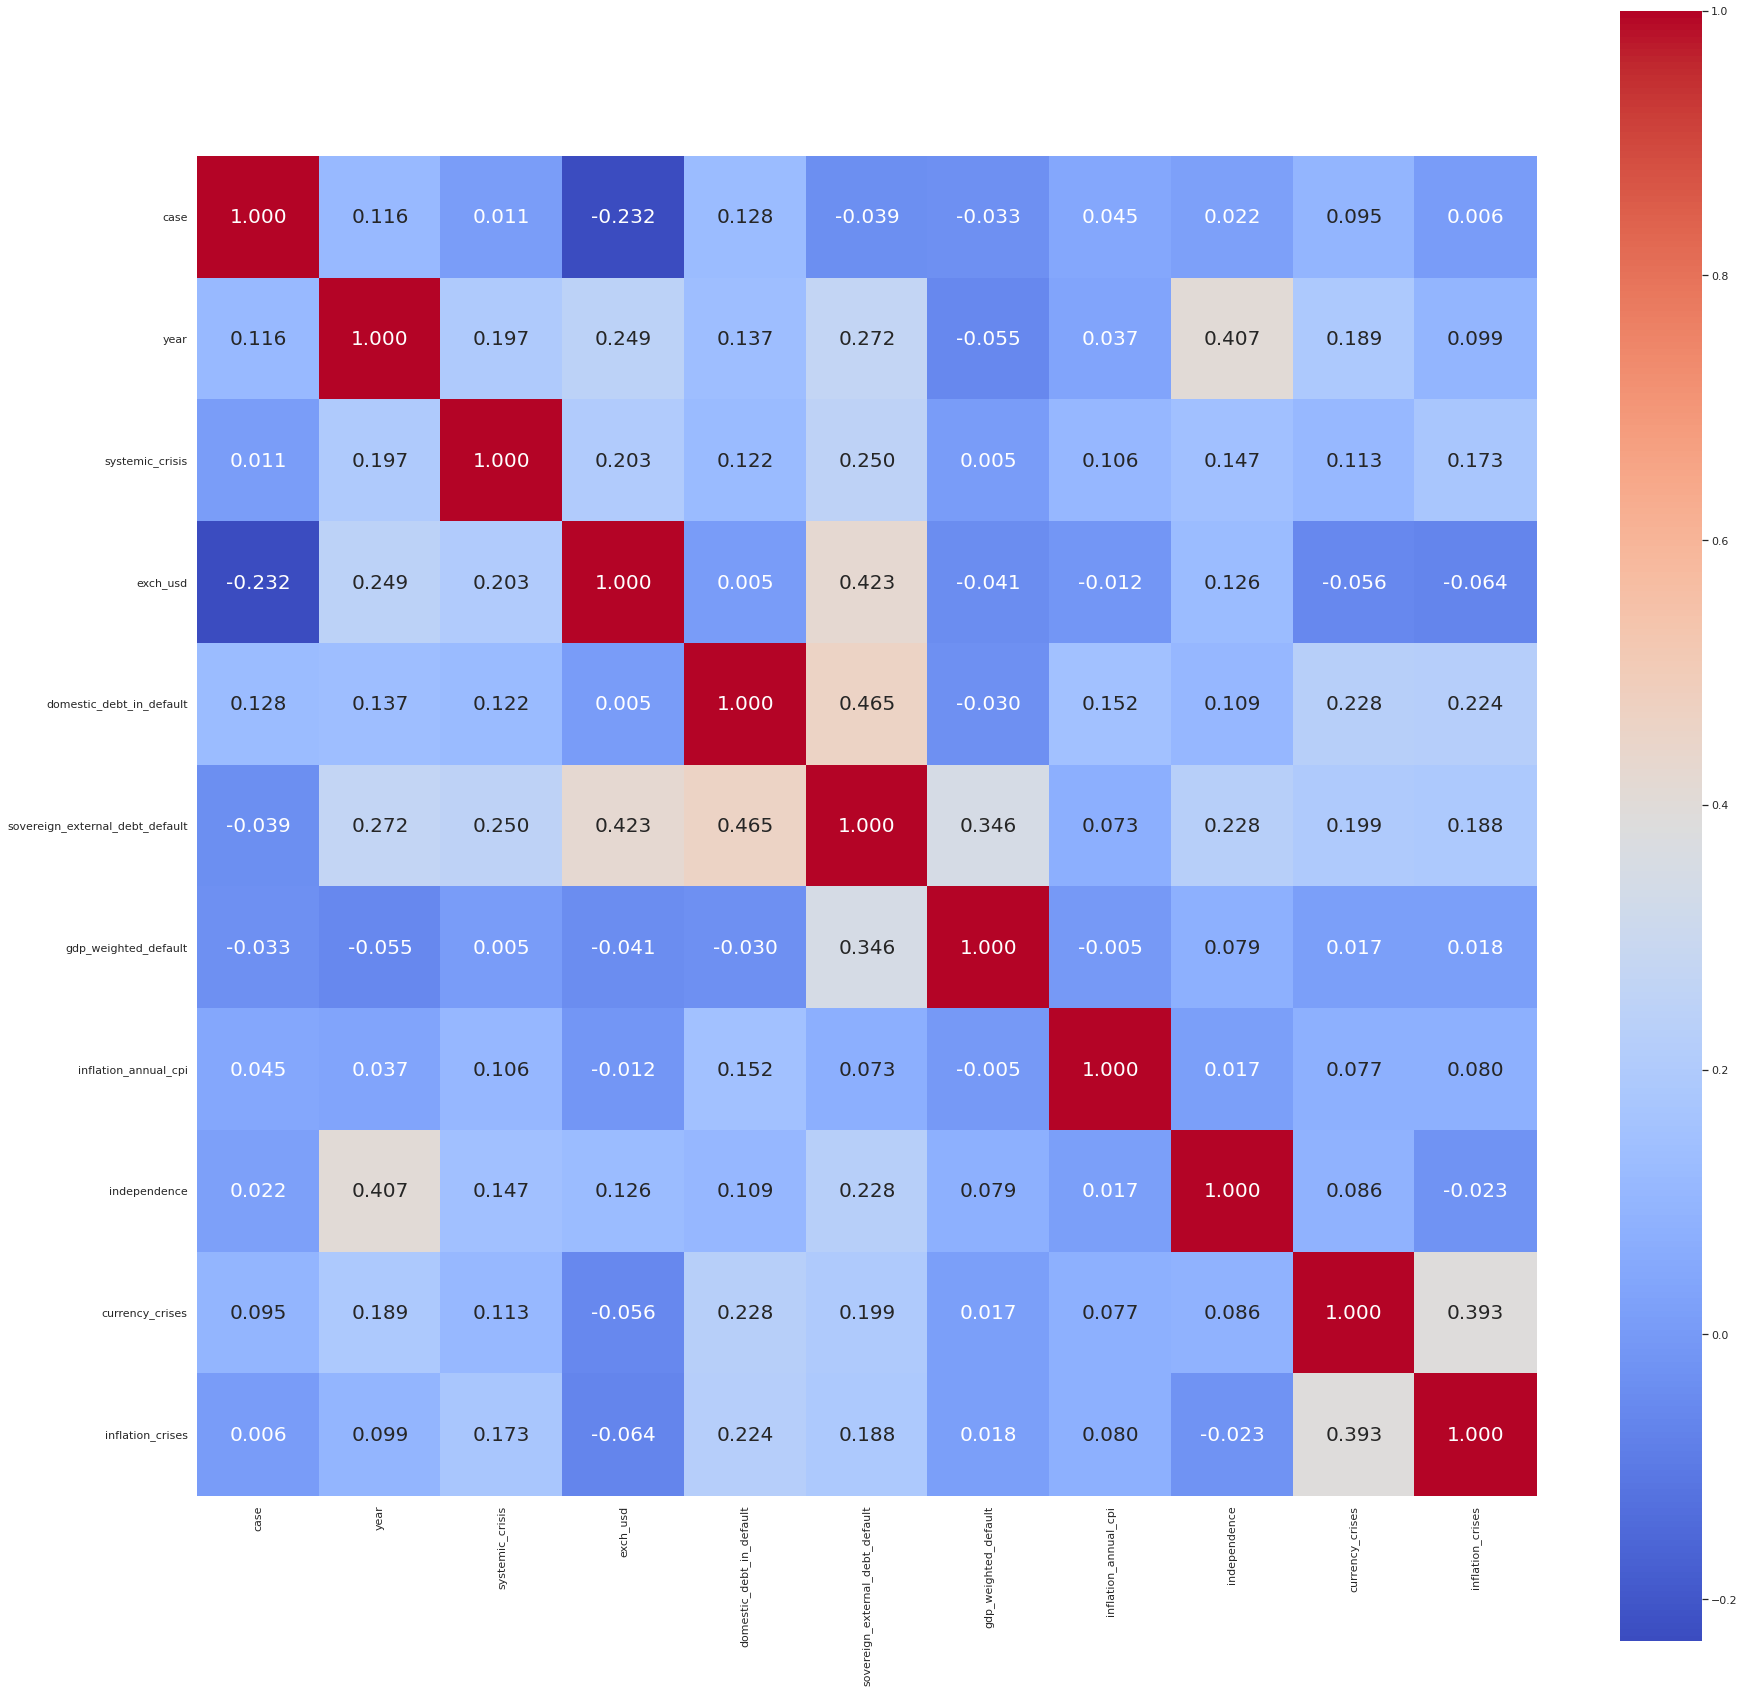

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(Correlation,cmap='coolwarm',annot=True,square=True, fmt ='.3f',annot_kws={'size' : 20})

Currency crises is correlated with inflation crises. Sovereign external debt default is correlated with exchange usd and domestic debt in default.

# 4.Models building

The goal of this part is to build an explanatory model that identifies which factors are most associated with banking crisis in Africa and also to come up with a model for predictions.

We are going to use different models such as:

*   Logistic regression
*   Simple Neural network

Our next step is to divide the data into “attributes” and “labels”. X variable contains all the attributes/features and Y variable contains labels.

## 4.1 Logistic Regression model

In [ ]:
# Divide the data into “attributes”  X and “labels”  Y 
X = data[['systemic_crisis', 'exch_usd', 'domestic_debt_in_default',
       'sovereign_external_debt_default', 'gdp_weighted_default',
       'inflation_annual_cpi', 'independence', 'currency_crises',
       'inflation_crises']]
X = pd.DataFrame(X)
# Define the Y variable 
Y = data['banking_crisis']

## percentage of  crisis & no crisis

count_no_crisis = len(data[Y=='no_crisis'])
count_crisis = len(data[Y=='crisis'])
pct_of_no_crisis = count_no_crisis/(count_no_crisis+count_crisis)
print("percentage of no crisis is", pct_of_no_crisis*100)
pct_of_crisis = count_crisis/(count_no_crisis+count_crisis)
print("percentage of crisis", pct_of_crisis*100)

percentage of no crisis is 91.123701605288
percentage of crisis 8.876298394711993


Label encoding to covert string values to integers

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#X.country = le.fit_transform(X.country)
Y = pd.DataFrame(Y)
Y.banking_crisis = le.fit_transform(Y.banking_crisis)

<class 'pandas.core.frame.DataFrame'>


In [ ]:
Y.head()

,banking_crisis
0,0
1,1
2,1
3,1
4,1


 Synthetic Minority Oversampling Technique (SMOTE)
This technique generates synthetic data for the minority class.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.


SMOTE algorithm works in 4 simple steps:

Choose a minority class as the input vector
Find its k nearest neighbors (k_neighbors is specified as an argument in the SMOTE() function)
Choose one of these neighbors and place a synthetic point anywhere on the line joining the point under consideration and its chosen neighbor
Repeat the steps until data is balanced





I have implemented SMOTE in Python.

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, Y)

print('Original dataset shape', Y.shape)
print('Resample dataset shape',y_smote.shape)

Original dataset shape (1059, 1)
Resample dataset shape (1930, 1)


In [ ]:
print("Before resampling data")
print("Number of crisis",len(Y[Y['banking_crisis']==1]))
print("Number of no crisis",len(Y[Y['banking_crisis']==0]))
print("After resampling data")
print("Number of crisis",len(y_smote[y_smote['banking_crisis']==1]))
print("Number of no crisis",len(y_smote[y_smote['banking_crisis']==0]))

Before resampling data
Number of crisis 965
Number of no crisis 94
After resampling data
Number of crisis 965
Number of no crisis 965


Implementing the model

Let’s first use randomforest

Now, X and y are ready for us. Let's split the data into Train and Test.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size=0.25,random_state=1)

I'll train the model with 75% of data and test the model with 25% of data.

Let's apply Random Forest Algorithm on the above scenario

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

model = RandomForestClassifier()

# Training the Algorithm
model.fit(X_train,y_train)

# Testing the Algorithm
y_pred = model.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


In [ ]:
Accuracy = accuracy_score(y_test,y_pred)*100
print('Accuracy : ',Accuracy,'%')
print('Confusion Matrix : \n')
confusion_matrix(y_test,y_pred)

Accuracy :  96.8944099378882 %
Confusion Matrix : 



array([[237,   6],
       [  9, 231]])

Hence, we have achieved an Accuracy of : 96.89 %
# Completed , cheers !!